<a href="https://colab.research.google.com/github/Cooper-9/Notes-from-class/blob/main/Kapitza_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pseudocode

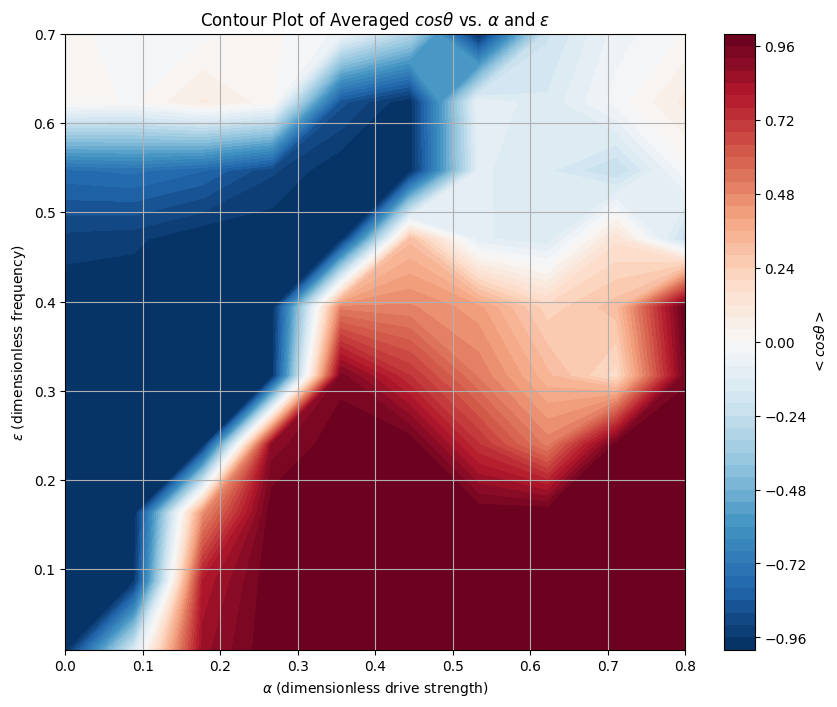

In [88]:
import matplotlib.pyplot as plt

# Create a meshgrid for alpha and epsilon
alpha_mesh, epsilon_mesh = np.meshgrid(alpha_list, epsilon_list)

plt.figure(figsize=(10, 8))
plt.contourf(alpha_mesh, epsilon_mesh, cos_theta_mesh, levels=50, cmap='RdBu_r')
plt.colorbar(label=r'$<cos\theta>$')
plt.xlabel(r'$\alpha$ (dimensionless drive strength)')
plt.ylabel(r'$\epsilon$ (dimensionless frequency)')
plt.title(r'Contour Plot of Averaged $cos\theta$ vs. $\alpha$ and $\epsilon$')
plt.grid(True)
plt.show()

### Define our equation of motion for pivot-drive pendulum


In the form of solve_ivp

In [81]:
# import modules
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [82]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# define equation of motion
def pivot_driven_pendulum(tau, y, epsilon, alpha, zeta):
  """
  tau: float
    dimensionless time: tau = omega_d * t
  alpha: float
    relative distplacement of the pivot ot the pendulum arm: alpha = y_0/l
  epsilon: float
    dimensionless frequency: epsilon = omega_0/omega_d
  zeta: float
    dimensionless damping coefficient
  Returns:
  dy_dtau: ndarray
    time derivatives of state variables

  """
  theta, ang_vel = y #unpack state variable
  dtheta_dtau = ang_vel #define angular velocity
  d2theta_dtau2 = -2*zeta*dtheta_dtau - (epsilon**2 - alpha*np.cos(tau))*np.sin(theta)
  dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
  return dy_dtau # return derivative

### Define utilities
1. **`Basic Plot`**:
2. **`alpha_critical`**: our gues for the boundary of the inverted state. Parameters are `zeta`, `epsilon`, `coefficient`; returns `alpha`.

In [83]:
# define basic plot

In [84]:
# define alpha_critical
def alpha_critical(epsilon, zeta, coefficient):
  """
  epsilon: float
    dimensionless frequency: epsilon = omega_0/omega_
  zeta: float
    dimensionless damping coefficient
  coefficient: float
    tuning parameter to help with fit
  Returns:
  alpha: float
    relative displacement of the pivot to the pendulum arm: alpha = y_0/l
  """
  alpha = coefficient*epsilon # our guess at the moment (omits zeta)
  return alpha

### Our function for time averaging the long time scale response (rename)

In [85]:
# test average long timescale response

epsilon = 0.2 # dimensionless angular frequency
alpha = 0.2 # dimensionless drive strength
zeta = 0.1 # dimensionless damping

# number of decay times we want to integrate over
n_decay = 500

delta_theta = 0.01 # deviation of theta from pi / inverted state

cos_theta_averaging, solution = average_long_timescale_response(epsilon, alpha, zeta, n_decay=n_decay)

### Solve the equation of motion

In [86]:
# input parameters
epsilon = 0.2 # dimensionless angular frequency
alpha = 0.2 # dimensionless drive strength
zeta = 0.1 # dimensionless damping

# number of decay times we want to integrate over
n_decay = 500

def average_long_timescale_response(epsilon, alpha, zeta, n_decay=100, delta_theta=0.01):
  # define span of tau
  tau_min = 0
  tau_max = n_decay/(2*zeta)
  tau_span = [tau_min, tau_max]

  # define an initial state
  delta_theta = 0.01 # deviation of theta from pi / inverted state
  theta_0 = np.pi - delta_theta
  ang_vel_0 = 0
  y_0 = [theta_0, ang_vel_0]

  # solve equation of motion
  solution = solve_ivp(pivot_driven_pendulum, tau_span, y_0, args=(epsilon, alpha, zeta), method='Radau', dense_output = True)

  # calculate our measure of the long timescale response
  tau_averaging_range = np.linspace(n_decay-1/(2*zeta), n_decay/(2*zeta), 1000)
  cos_theta_averaging = np.mean(np.cos(solution.sol(tau_averaging_range) [0]))


  return cos_theta_averaging, solution

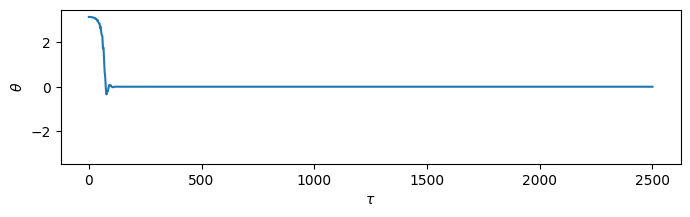

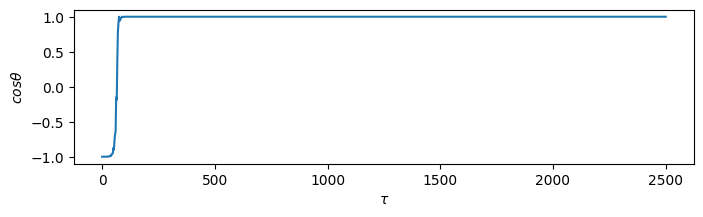

In [87]:
# plot theta
tau_plot = np.linspace(tau_min, tau_max, 1000)
theta_plot = solution.sol(tau_plot)[0]

# plot theta
plt.figure(figsize=(8,2))
plt.plot(tau_plot, (theta_plot))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
plt.ylim(-np.pi*1.1, np.pi*1.1)
plt.show()

plt.figure(figsize=(8,2))
plt.plot(tau_plot, np.cos((theta_plot)))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$cos\theta$')
plt.ylim(-1.1, 1.1)
plt.show()